<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.948468,-0.000457,79.948011,79.948421,-0.000410
1,0.0,1.0,71.797404,-0.001017,81.796388,81.797361,-0.000973
2,0.0,2.0,58.493890,-0.000773,68.493117,68.493823,-0.000706
3,0.0,3.0,96.654501,0.000056,106.654557,106.654503,0.000055
4,0.0,4.0,91.450489,0.000098,101.450588,101.450481,0.000106
...,...,...,...,...,...,...,...
249995,999.0,245.0,84.627358,0.000101,94.627459,94.627430,0.000028
249996,999.0,246.0,61.105547,-0.000205,71.105342,71.105405,-0.000063
249997,999.0,247.0,26.630904,-0.001117,36.629786,36.630448,-0.000661
249998,999.0,248.0,75.108741,0.000517,85.109258,85.108726,0.000532


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.948468,-0.000457,79.948011,79.948421,-0.000410
1,0.0,1.0,71.797404,-0.001017,81.796388,81.797361,-0.000973
2,0.0,2.0,58.493890,-0.000773,68.493117,68.493823,-0.000706
3,0.0,3.0,96.654501,0.000056,106.654557,106.654503,0.000055
4,0.0,4.0,91.450489,0.000098,101.450588,101.450481,0.000106
...,...,...,...,...,...,...,...
249995,999.0,245.0,84.627358,0.000101,94.627459,94.627430,0.000028
249996,999.0,246.0,61.105547,-0.000205,71.105342,71.105405,-0.000063
249997,999.0,247.0,26.630904,-0.001117,36.629786,36.630448,-0.000661
249998,999.0,248.0,75.108741,0.000517,85.109258,85.108726,0.000532


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    69.948468 -0.000457   79.948011   79.948421 -0.000410
      1.0    71.797404 -0.001017   81.796388   81.797361 -0.000973
      2.0    58.493890 -0.000773   68.493117   68.493823 -0.000706
      3.0    96.654501  0.000056  106.654557  106.654503  0.000055
      4.0    91.450489  0.000098  101.450588  101.450481  0.000106
...                ...       ...         ...         ...       ...
999.0 245.0  84.627358  0.000101   94.627459   94.627430  0.000028
      246.0  61.105547 -0.000205   71.105342   71.105405 -0.000063
      247.0  26.630904 -0.001117   36.629786   36.630448 -0.000661
      248.0  75.108741  0.000517   85.109258   85.108726  0.000532
      249.0  55.615654 -0.001436   65.614219   65.615462 -0.001244

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    69.948468 -0.000457   79.948011   79.948421 -0.000410
      1.0    71.797404 -0.001017   81.796388   81.797361 -0.000973
      2.0    58.493890 -0.000773   68.493117   68.493823 -0.000706
      3.0    96.654501  0.000056  106.654557  106.654503  0.000055
      4.0    91.450489  0.000098  101.450588  101.450481  0.000106
...                ...       ...         ...         ...       ...
999.0 245.0  84.627358  0.000101   94.627459   94.627430  0.000028
      246.0  61.105547 -0.000205   71.105342   71.105405 -0.000063
      247.0  26.630904 -0.001117   36.629786   36.630448 -0.000661
      248.0  75.108741  0.000517   85.109258   85.108726  0.000532
      249.0  55.615654 -0.001436   65.614219   65.615462 -0.001244

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,69.948468,-0.000457,79.948011,79.948421,-0.000410
1,0.0,1.0,71.797404,-0.001017,81.796388,81.797361,-0.000973
2,0.0,2.0,58.493890,-0.000773,68.493117,68.493823,-0.000706
3,0.0,3.0,96.654501,0.000056,106.654557,106.654503,0.000055
4,0.0,4.0,91.450489,0.000098,101.450588,101.450481,0.000106
...,...,...,...,...,...,...,...
249995,999.0,245.0,84.627358,0.000101,94.627459,94.627430,0.000028
249996,999.0,246.0,61.105547,-0.000205,71.105342,71.105405,-0.000063
249997,999.0,247.0,26.630904,-0.001117,36.629786,36.630448,-0.000661
249998,999.0,248.0,75.108741,0.000517,85.109258,85.108726,0.000532


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    69.948468 -0.000457   79.948011   79.948421 -0.000410
      1.0    71.797404 -0.001017   81.796388   81.797361 -0.000973
      2.0    58.493890 -0.000773   68.493117   68.493823 -0.000706
      3.0    96.654501  0.000056  106.654557  106.654503  0.000055
      4.0    91.450489  0.000098  101.450588  101.450481  0.000106
...                ...       ...         ...         ...       ...
999.0 245.0  84.627358  0.000101   94.627459   94.627430  0.000028
      246.0  61.105547 -0.000205   71.105342   71.105405 -0.000063
      247.0  26.630904 -0.001117   36.629786   36.630448 -0.000661
      248.0  75.108741  0.000517   85.109258   85.108726  0.000532
      249.0  55.615654 -0.001436   65.614219   65.615462 -0.001244

[250000 rows x 5 columns]

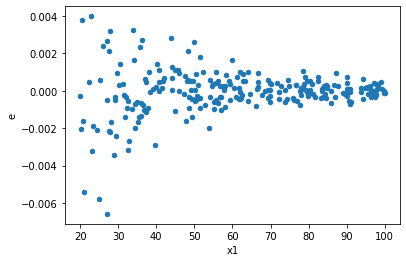

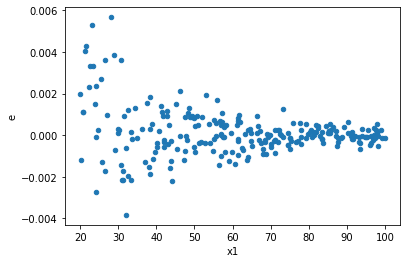

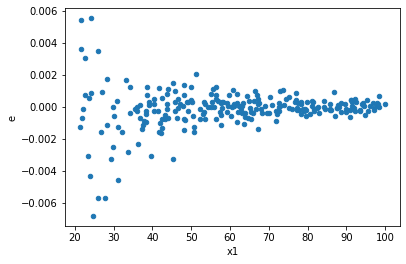

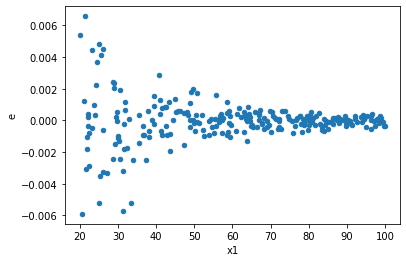

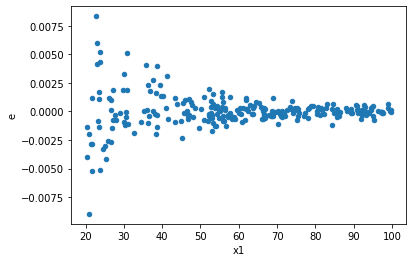

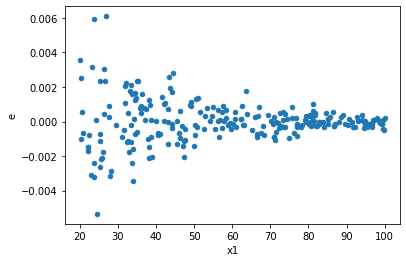

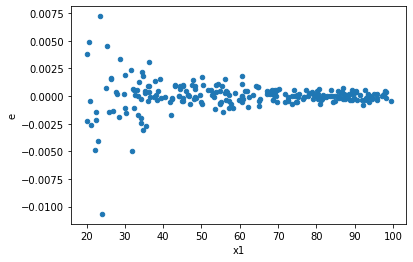

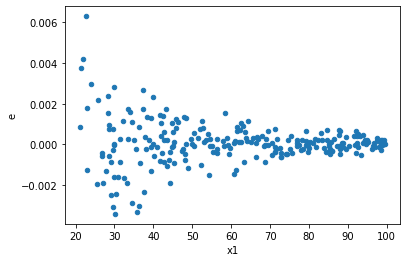

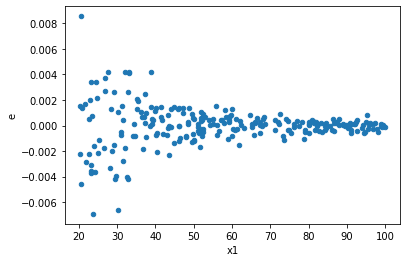

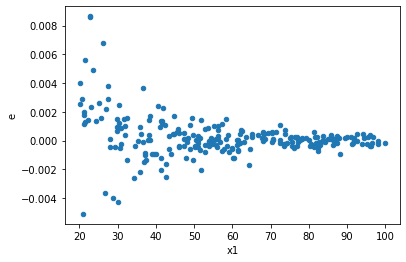

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.0006942365998966011,1.0489685290733484e-05,7.012490908046476e-06,1.05956417078116e-07,0.015109669084424255,8.834655334701924e-63,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,0.00041867399541272094,1.5043260405695203e-05,4.229030256694151e-06,1.5195212531005256e-07,0.03593072550604878,5.168695840484413e-45,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,0.000539540193869367,1.233994427158997e-05,5.4499009481754245e-06,1.24645901733232e-07,0.022871223333877706,3.4435260993469563e-54,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,0.0003796156457179538,1.3574520816069925e-05,3.8345014718985235e-06,1.371163718794942e-07,0.035758591536439205,4.141361839548999e-45,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,0.0004439444595065292,1.2034410675135446e-05,4.4842874697629215e-06,1.2155970378924692e-07,0.027107919509824295,1.0383053522319273e-50,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,0.0006039436718479365,1.809204501265484e-05,6.100441129777136e-06,1.8274792942075596e-07,0.02995651060850942,1.1161509325525006e-48,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,0.0003001579688479992,1.6743253391320833e-05,3.031898675232315e-06,1.6912377162950336e-07,0.055781472188065284,2.343425675239899e-36,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,0.00036594605896447807,1.80723044251808e-05,3.696424838025031e-06,1.825485295472808e-07,0.04938515932189628,1.0173221060241908e-38,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,0.0003526204813245154,1.4052713243419411e-05,3.5618230436819735e-06,1.4194659841837789e-07,0.03985223203891764,6.0409248998480754e-43,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64